In [ ]:
"""
This toy model is based on Lab 7 in the course DIT822 Software Engineering for AI Systems. It uses the deep funneled version
of the lfw (Labeled Faces in the Wild) dataset by Gary B. Huang, Marwan Mattar, Honglak Lee, and Erik Learned-Miller
from the University of Massachusetts Amherst. The toy model also uses the same dataset for both the training and testing set.
"""

# import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('./initial-data.csv', sep=',')
test_df = pd.read_csv('./initial-data.csv', sep = ',')

: 

In [29]:
labels_column = 'Label'

# Extract labels and pixel values
labels = train_df['Label']
train_pixel_columns = train_df.drop('Label', axis=1)
test_pixel_columns = test_df.drop('Label', axis=1)

# Use LabelEncoder to encode labels into unique numeric values
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

# Concatenate encoded labels with pixel values
training = np.column_stack((encoded_labels, np.array(train_pixel_columns, dtype='float32')))
testing = np.column_stack((encoded_labels, np.array(test_pixel_columns, dtype='float32')))

In [30]:
training.shape

(10, 187501)

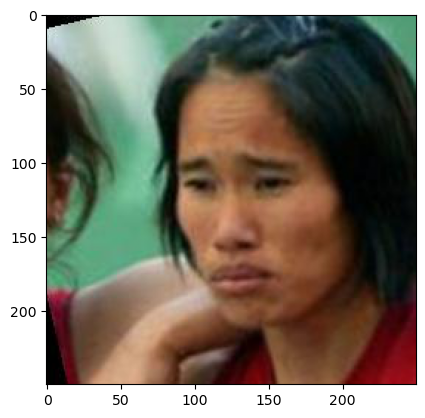

In [31]:
i = random.randint(1,9)
reshaped_image = training[i, 1:].reshape((250, 250, 3))
reshaped_image /= 255.0  # Normalize to the range [0.0, 1.0]
plt.imshow(reshaped_image)

In [32]:
label = training[i,0]
label

8.0

In [33]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]



In [34]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [35]:
X_train = X_train.reshape(X_train.shape[0], *(250, 250, 3))
X_test = X_test.reshape(X_test.shape[0], *(250, 250, 3))
X_validate = X_validate.reshape(X_validate.shape[0], *(250, 250, 3))


In [36]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [37]:
#CNN model using keras
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(250,250,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

###########################################################

num_epochs = 3  #number of epochs
batch_size = 32 #batch size

history = model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_validate, y_validate))


Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 2.2712 - accuracy: 0.2500 - val_loss: 10.6449 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 496ms/step - loss: 1.8776 - accuracy: 0.7500 - val_loss: 9.1696 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 1s 519ms/step - loss: 1.4388 - accuracy: 0.6250 - val_loss: 7.9972 - val_accuracy: 0.0000e+00


In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.6000000238418579


In [39]:
predicted_probabilities = model.predict(X_test)

# Find the class with the highest probability for each data point
predicted_classes = np.argmax(predicted_probabilities, axis=1)

1/1 [==============================] - 0s 194ms/step


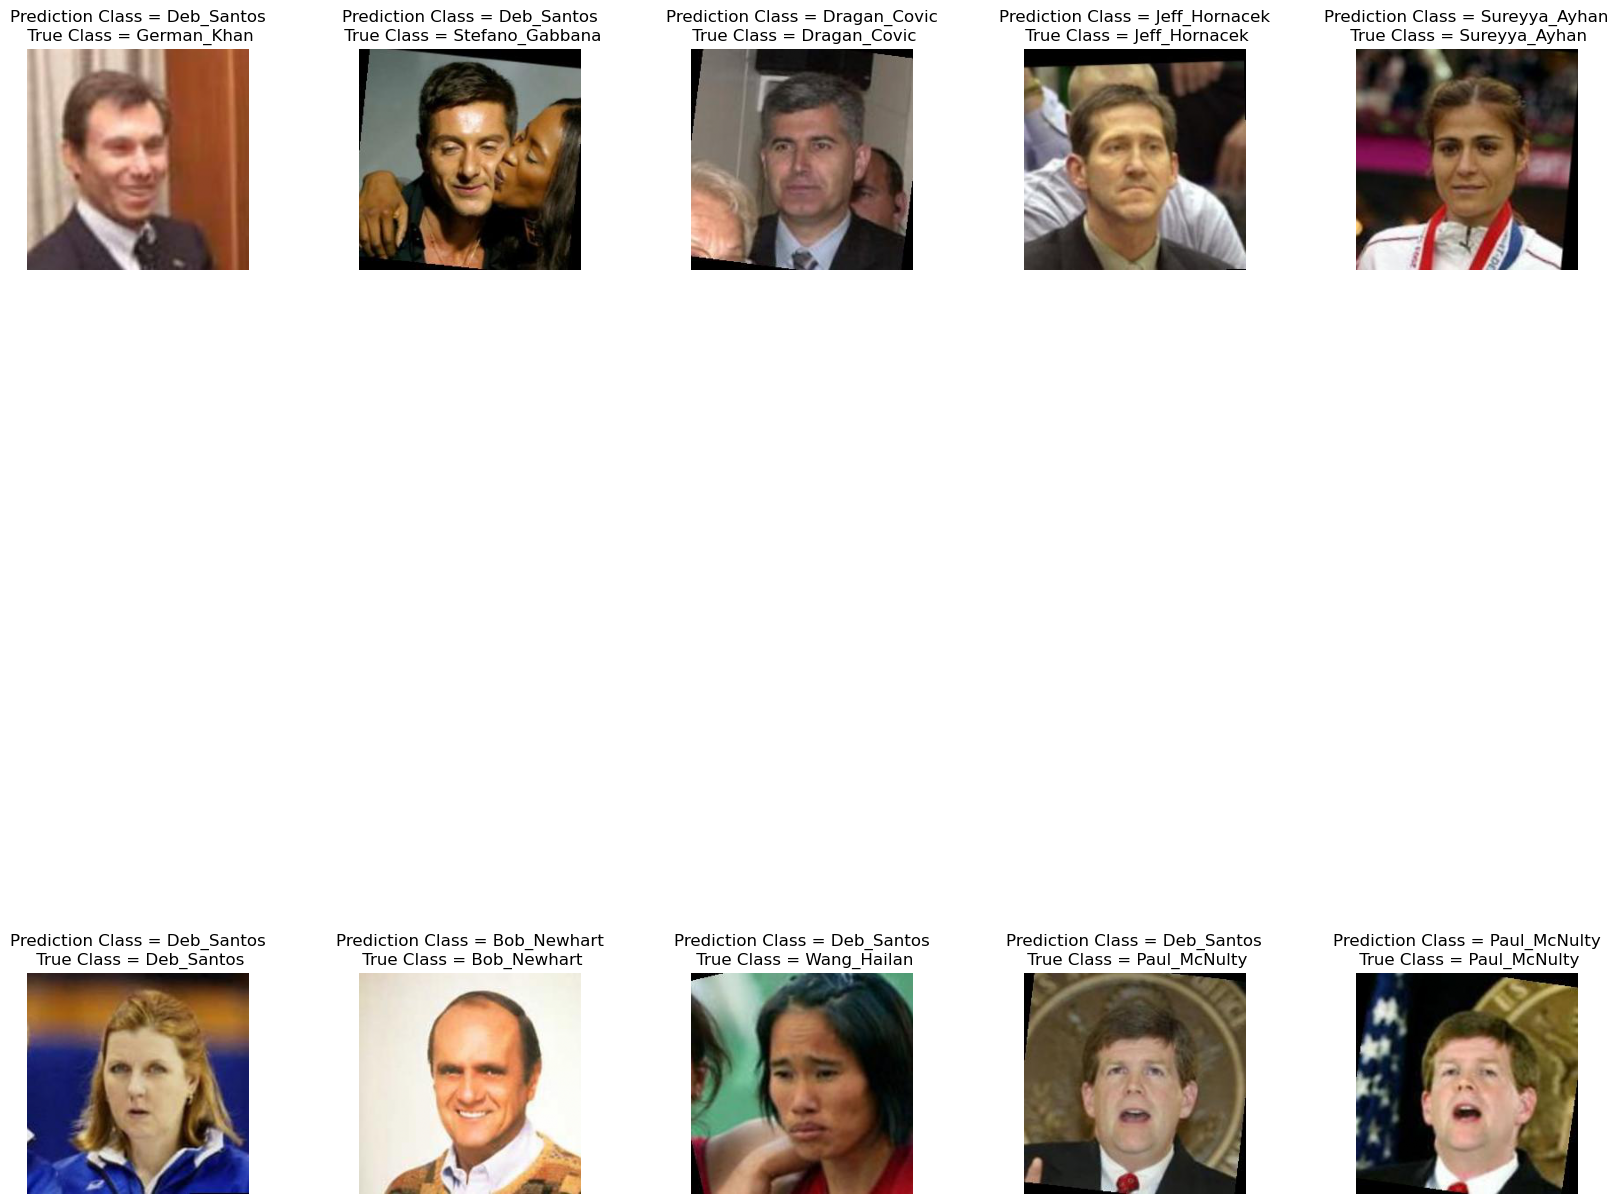

In [40]:
L = 2
W = 5
fig, axes = plt.subplots(L, W, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, L * W):
    
    # Convert the label to an integer
    true_label_int = int(y_test[i])
    
    # Inverse transform the label to get the original string label
    original_label = le.inverse_transform([true_label_int])[0]
    
    # Convert the predicted label to an integer
    predicted_label_int = int(predicted_classes[i])
    
    # Inverse transform the predicted label to get the original string label
    predicted_label = le.inverse_transform([predicted_label_int])[0]
    
    axes[i].imshow(X_test[i].reshape(250, 250, 3))
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_label, original_label))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
